In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from scipy.optimize import minimize
from matplotlib import colors as mcolors

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from datetime import datetime
import tclab
import time

import os

from package_Engels_Theo_Losseau_Baudouin import Lead_Lag_Discreet_RT, PID_RT, FF_RT, sim_tclabP,PID, IMC_Tuning_SOPDT,bodePID,bodePC,Margin

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

# Function used for interaction with TCLab

In [2]:
TSim = 1500
Ts = 1
N = int(TSim/Ts) + 1
print(N)

#test
# Path for MV and MVMan
# SPPath = {0: 50,800:60}
# PVPath = {0:0}
# ManPath={0:0,200:0,300:0}
# MVManPath={0:50}
# DVPath={0:50}

# scenario_name=1
# SPPath = {0: 50}
# ManPath={0:1}
# MVManPath={0:50,600:60}
# DVPath={0:50}
# FF=0

# scenario_name=2
# SPPath = {0: 50}
# ManPath={0:1}
# MVManPath={0:50}
# DVPath={0:50,600:70}
# FF=0

# scenario_name=3
# SPPath = {0: 50,600:70}
# ManPath={0:0,300:0}
# MVManPath={0:50}
# DVPath={0:50}
# FF=0

# scenario_name= "Response to DV : No FF and controller in manual mode"
# SPPath = {0: 50}
# ManPath={0:1}
# MVManPath={0:50}
# DVPath={0:40,500:70}
# FF=0

# "Response_to_DV:FF_and_controller_in_manual_mode"
# scenario_name= "5"
# SPPath = {0: 50}
# ManPath={0:1}
# MVManPath={0:50}
# DVPath={0:40,500:70}
# FF=1

#"Response_to_DV-No_FF_and_controller_in_automatic_mode"
# scenario_name= "Response_to_DV-No_FF_and_controller_in_automatic_mode"
# SPPath = {0: 50}
# ManPath={0:0}
# MVManPath={0:50}
# DVPath={0:40,500:55}
# FF=0

# "Response_to_DV-FF_and_controller_in_automatic_mode"
# scenario_name= "Response_to_DV-FF_and_controller_in_automatic_mode"
# SPPath = {0: 50}
# ManPath={0:0}
# MVManPath={0:50}
# DVPath={0:40,500:55}
# FF=1

# scenario_name= "8"
# SPPath = {0: 70,500:80,900:60}
# ManPath = {0:1,150:0}
# MVManPath={0:50}
# DVPath = {0:50,1000:70}
# FF=1

"Response_to_DV-FF_and_controller_in_automatic_mode"
scenario_name= "Response_to_DV-FF_and_controller_in_automatic_mode_perturbation-ext"
SPPath = {0: 50}
ManPath={0:0}
MVManPath={0:50}
DVPath={0:50,500:50}
FF=1


# t = []
# MV = [0]
# PV = []
# SP = [0]
# MVP = []
# MVI = []
# MVD = []
# E = [0]
# Et = []


Kp = 0.39
Kd = 0.63

Tlead1 = 47.84
Tlag1 = 245.36
Tlead2 = 17.39
Tlag2 = 3.13
Theta1 = 9.31
Theta2 = 0.56
gamma = 0.2
Kc,Ti,Td = IMC_Tuning_SOPDT(Kp,Tlead1,Tlead2,Theta1,gamma)
satMin = 0
satMax = 100
PVInit = 50

DV0=50
MV0 = 50
PV0 = 73.75

t = []
MV = []
MVMan = []
Man = []
PV = []
SP = []
MVP = []
MVI = []
MVD = []
E = []
Et = []
MVFF = []
ODV = []
OPV = []
DV = []
PVtemp1 = []
PVtemp2 = []
DVtemp1 = []
DVtemp2 = []

FFtemp1 = []
FFtemp2 = []




# fig, (ax1) = plt.subplots(1,1)
# l1,=ax1.step([0,TSim],[0,100],'m-', linewidth=2, label='MV', where='post')
# l2,=ax1.step([0,TSim],[0,100],'b-', linewidth=2, label='MV_P', where='post')
# l3,=ax1.step([0,TSim],[0,100],'r-', linewidth=2, label='MV_I', where='post')
# l4,=ax1.step([0,TSim],[0,100],'g-', linewidth=2, label='MV_D', where='post')
# ax1.set_ylabel('Value of MV [%]')
# ax1.legend(loc='best')
    
lab = tclab.TCLab()
for i in range(0,N):
    t.append(i*Ts)

    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(DVPath,t,DV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    PV.append(lab.T1)
    lab.Q2(DV[-1])
    DV[-1]-=DV0
    FF_RT(DV,Tlead1,Tlag1,Tlead2,Tlag2,Theta1,Theta2,Kp,Kd,Ts,MVFF,FFtemp1,FFtemp2)
    PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E,FF = FF,PVInit = PVInit,ManFF=True)
    
    print(lab.T1,lab.T2,i*Ts)
    clear_output(wait=True)
    lab.Q1(MV[-1])
    
    #PV.append(OPV[-1]+ODV[-1]+PV0-Kp*MV0)
    time.sleep(Ts)
    
lab.close()


print(len(MV))
print(len(t))

    
print("fini")   

TCLab disconnected successfully.
1501
1501
fini


Data/PID_STEP_PV_Response_to_DV-FF_and_controller_in_automatic_mode_perturbation-ext_2022-04-01-23h00.txt 


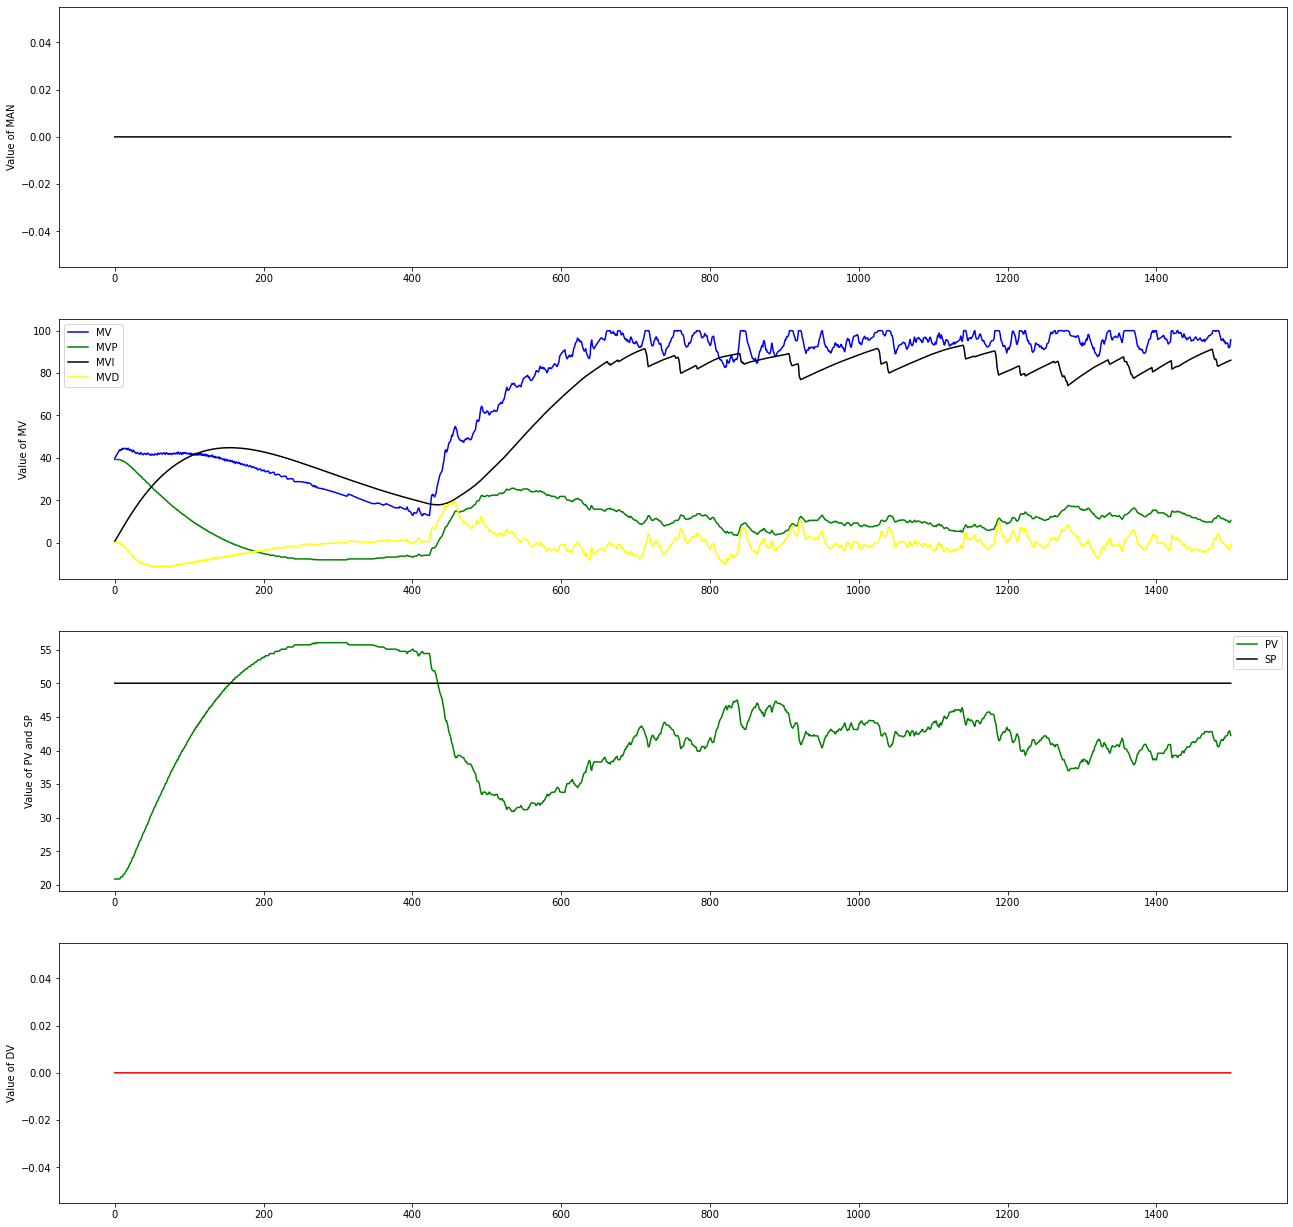

In [3]:
    
# plt.figure(figsize = (15,9))

# plt.step(t,MV,'b',label='MV',where='post')
# #plt.step(t,PV,'skyblue',label='PV',where='post')
# plt.step(t,MVD,'red',label='MVD',where='post')
# plt.step(t,MVI,'green',label='MVI',where='post')
# plt.step(t,MVP,'b--',label='MVP',where='post')
# plt.step(t,E,'black',label='E',where='post')
# plt.step(t,PV[:-1],'g--',label='PV',where='post')
# #plt.step(t,PV,'orange',label='PV',where='post')
# plt.ylabel('Value of MV')
# plt.legend(loc='best')
# plt.title('Path response')
# plt.xlim([0, TSim])

fig,(ax,bx,cx,dx) = plt.subplots(4)
fig.set_figheight(22)
fig.set_figwidth(22)

ax.plot(t,Man,'black')
ax.set(ylabel='Value of MAN')

bx.plot(t,MV,'blue',label = "MV")
bx.set(ylabel='Value of MV')
bx.plot(t,MVP,'green' , label = "MVP")
bx.plot(t,MVI,'black', label = "MVI")
bx.plot(t,MVD,'yellow' ,label = "MVD")
bx.legend(loc='best')

cx.plot(t,PV,'green',label="PV")
cx.plot(t,SP,'black',label = "SP")
cx.set(ylabel='Value of PV and SP')
cx.legend(loc='best')


dx.plot(t,DV,'red')
dx.set(ylabel='Value of DV')

now = datetime.now()
date_time = now.strftime("%Y-%m-%d-%Hh%M")

nameFile='Plots/PID_STEP_PV_' + str(scenario_name)+'_'+date_time
plt.savefig(nameFile + '.png',transparent=True)


nameFile='Data/PID_STEP_PV_'  +str(scenario_name) +'_'+ date_time+ '.txt '
print(nameFile)

t=np.array(t)
MV=np.array(MV)
MVP=np.array(MVP)
MVI=np.array(MVI)
MVD=np.array(MVD)
SP=np.array(SP)
PV=np.array(PV)
DV=np.array(DV)
Man=np.array(Man)

my_data = np.vstack((t.T,MV.T,MVP.T, MVI.T,MVD.T,PV.T,SP.T,DV.T,Man.T)) 
my_data= my_data.T
np.savetxt(nameFile, my_data, delimiter=',',header='t,MV,MVP,MVI,MVD,PV,SP,DV,Man',comments='')
    

# Experimentation parameters

In [4]:
Ts = 1

# Real-time visualition of the experimental signals